<a href="https://colab.research.google.com/github/LingyiC/World-Happiness-Report-Visualization-and-Prediction/blob/master/Index_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# delete _pycache_ folder first
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization

import warnings            
warnings.filterwarnings("ignore") 

#from pandas.tools.plotting import parallel_coordinates

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [0]:
#load data from csv file
data_2016=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2016.csv')
data_2017=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2017.csv')
data_2018=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2018.csv')
data_2019=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2019.csv')


In [0]:
# unify the header

data_2016.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2016.columns]
data_2017.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2017.columns]
data_2018.columns=[each.replace("."," ") for each in data_2018.columns]
data_2018.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2018.columns]

In [48]:
data_2016.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Factors affecting happiness score

In [0]:
def Factors_plot(country):
  
  # 2016
  data = data_2016[data_2016['Country'].str.contains(country)]
  color = ["lightgreen", "gold","lightskyblue","pink","coral","orchid","cornflowerblue"]
  plt.figure(figsize=(6,5))
  numbers = [int(data["Economy"]), data["Family"], data["Health"], data["Freedom"], data["Generosity"],data["Trust"],data["Dystopia_Residual"]]
  factors = ['Economy', 'Family', 'Health', 'Freedom', 'Generosity','Trust','Dystopia Residual']
  plt.pie(numbers, labels=factors, startangle=90, autopct='%.1f%%', colors=color)
  plt.title("Factors affecting {} happiness score in 2016".format(country))
  plt.show()
  
  # 2017
  data = data_2017[data_2017['Country'].str.contains(country)]
  numbers = [int(data["Economy"]), data["Family"], data["Health"], data["Freedom"], data["Generosity"],data["Trust"],data["Dystopia_Residual"]]
  factors = ['Economy', 'Family', 'Health', 'Freedom', 'Generosity','Trust','Dystopia Residual']
  plt.figure(figsize=(6,5))
  plt.pie(numbers, labels=factors, startangle=90, autopct='%.1f%%', colors=color)
  plt.title("Factors affecting {} happiness score in 2017".format(country))
  plt.show()
  
  # 2018
  data = data_2018[data_2018['Country'].str.contains(country)]
  numbers = [int(data["Economy"]), data["Family"], data["Health"], data["Freedom"], data["Generosity"],data["Trust"],data["Dystopia_Residual"]]
  factors = ['Economy', 'Family', 'Health', 'Freedom', 'Generosity','Trust','Dystopia Residual']
  plt.figure(figsize=(6,5))
  plt.pie(numbers, labels=factors, startangle=90, autopct='%.1f%%', colors=color)
  plt.title("Factors affecting {} happiness score in 2018".format(country))
  plt.show()

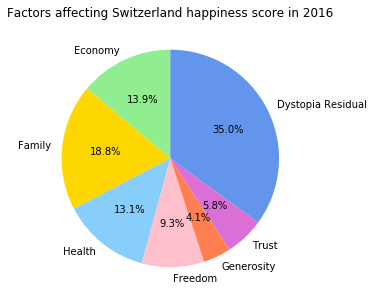

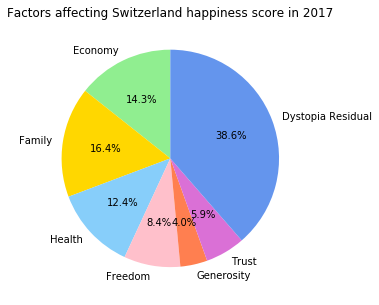

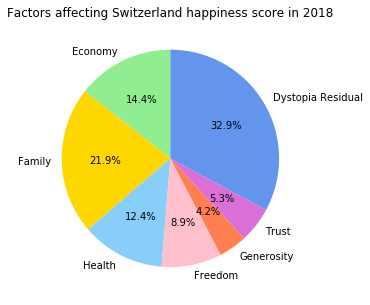

In [203]:
# Change the country name 
Factors_plot("Switzerland")

## Happiness changing and rank

In [0]:
def Happiness_changing_plot(country):
  year = ["2016","2017","2018"]
  data = data_2016[data_2016['Country'].str.contains(country)]
  score_2016 = data['Happiness_Score'].values
  rank_2016 = data['Happiness_Rank'].values
  data = data_2017[data_2017['Country'].str.contains(country)]
  score_2017 = data['Happiness_Score'].values
  rank_2017 = data['Happiness_Rank'].values
  data = data_2018[data_2018['Country'].str.contains(country)]
  score_2018 = data['Happiness_Score'].values
  rank_2018 = data['Happiness_Rank'].values
  numbers = [score_2016, score_2017, score_2018]
  numbers_2 = [int(rank_2016), rank_2017, rank_2018]
  print(score_2017)
  
  # score
  plt.figure(figsize=(6,5))
  plt.plot(year, numbers, color='orangered')
  plt.xlabel('Year')
  plt.ylabel('Happiness score')
  plt.text('2016', score_2016, "Rank {}".format(int(rank_2016)))
  plt.text('2017', score_2017, "Rank {}".format(int(rank_2017)))
  plt.text('2018', score_2018, "Rank {}".format(int(rank_2018)))  
  plt.title('Happiness score changing in {}'.format(country))
  plt.show()
  
  # rank
  plt.figure(figsize=(6,5))
  plt.bar(year, numbers_2, color='cornflowerblue')
  plt.xlabel('Year')
  plt.ylabel('Happiness rank')
  plt.title('Happiness rank in {}'.format(country))
  plt.show()
  
  
  
  

[7.509]


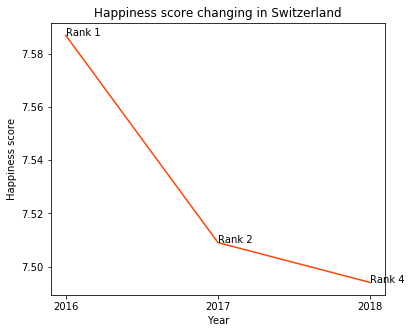

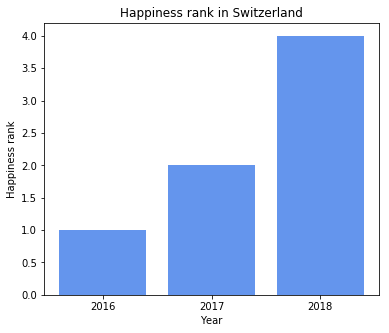

In [201]:
# Change the country name 
Happiness_changing_plot("Switzerland")